In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

df = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Grade Prediction\\Extended_Employee_Performance_and_Productivity_Data.csv")

df.head(10)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
5,6,IT,Male,43,Manager,2016-08-14 08:03:05.556036,8,High School,3,7800.0,46,31,8,0,100,15,95,0,2.77,False
6,7,IT,Male,37,Technician,2023-08-28 08:03:05.556036,1,Bachelor,5,5250.0,55,20,29,2,0,16,27,0,4.46,False
7,8,Engineering,Female,55,Engineer,2014-10-27 08:03:05.556036,9,Bachelor,2,7200.0,42,46,7,8,100,7,64,0,2.09,False
8,9,Marketing,Female,55,Technician,2023-06-29 08:03:05.556036,1,High School,2,4200.0,51,23,21,14,0,1,0,1,1.44,False
9,10,Engineering,Female,45,Consultant,2016-12-23 08:03:05.556036,7,Bachelor,1,6050.0,41,33,2,6,75,4,53,2,2.93,False


#### Data Inspecting & Data Cleaning & Exploratory Data Analysis

In [2]:
# normalize column names 
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns)

Index(['employee_id', 'department', 'gender', 'age', 'job_title', 'hire_date',
       'years_at_company', 'education_level', 'performance_score',
       'monthly_salary', 'work_hours_per_week', 'projects_handled',
       'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size',
       'training_hours', 'promotions', 'employee_satisfaction_score',
       'resigned'],
      dtype='object')


In [3]:
# info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   employee_id                  100000 non-null  int64  
 1   department                   100000 non-null  object 
 2   gender                       100000 non-null  object 
 3   age                          100000 non-null  int64  
 4   job_title                    100000 non-null  object 
 5   hire_date                    100000 non-null  object 
 6   years_at_company             100000 non-null  int64  
 7   education_level              100000 non-null  object 
 8   performance_score            100000 non-null  int64  
 9   monthly_salary               100000 non-null  float64
 10  work_hours_per_week          100000 non-null  int64  
 11  projects_handled             100000 non-null  int64  
 12  overtime_hours               100000 non-null  int64  
 13  

In [4]:
# drop unecessary columns 
df.drop(columns=['employee_id', 'hire_date', 'work_hours_per_week', 'sick_days', 'remote_work_frequency', 'team_size', 'training_hours', 'resigned'], inplace=True) 

In [5]:
df.columns

Index(['department', 'gender', 'age', 'job_title', 'years_at_company',
       'education_level', 'performance_score', 'monthly_salary',
       'projects_handled', 'overtime_hours', 'promotions',
       'employee_satisfaction_score'],
      dtype='object')

In [6]:
# check for missing values 
df.isna().sum()

department                     0
gender                         0
age                            0
job_title                      0
years_at_company               0
education_level                0
performance_score              0
monthly_salary                 0
projects_handled               0
overtime_hours                 0
promotions                     0
employee_satisfaction_score    0
dtype: int64

In [7]:
# Check for duplicated rows 
df.duplicated().sum()

np.int64(0)

In [8]:
# Identify average `monthly_salary` per `department`
mean_sal_dep = df.groupby('department')['monthly_salary'].mean().sort_values( ascending=False).reset_index()
mean_sal_dep

,department,monthly_salary
0,Engineering,6417.246258
1,IT,6414.598868
2,Sales,6413.154109
3,Operations,6412.306592
4,Customer Support,6403.881792
5,HR,6400.355839
6,Finance,6398.575893
7,Legal,6391.275409
8,Marketing,6377.857525


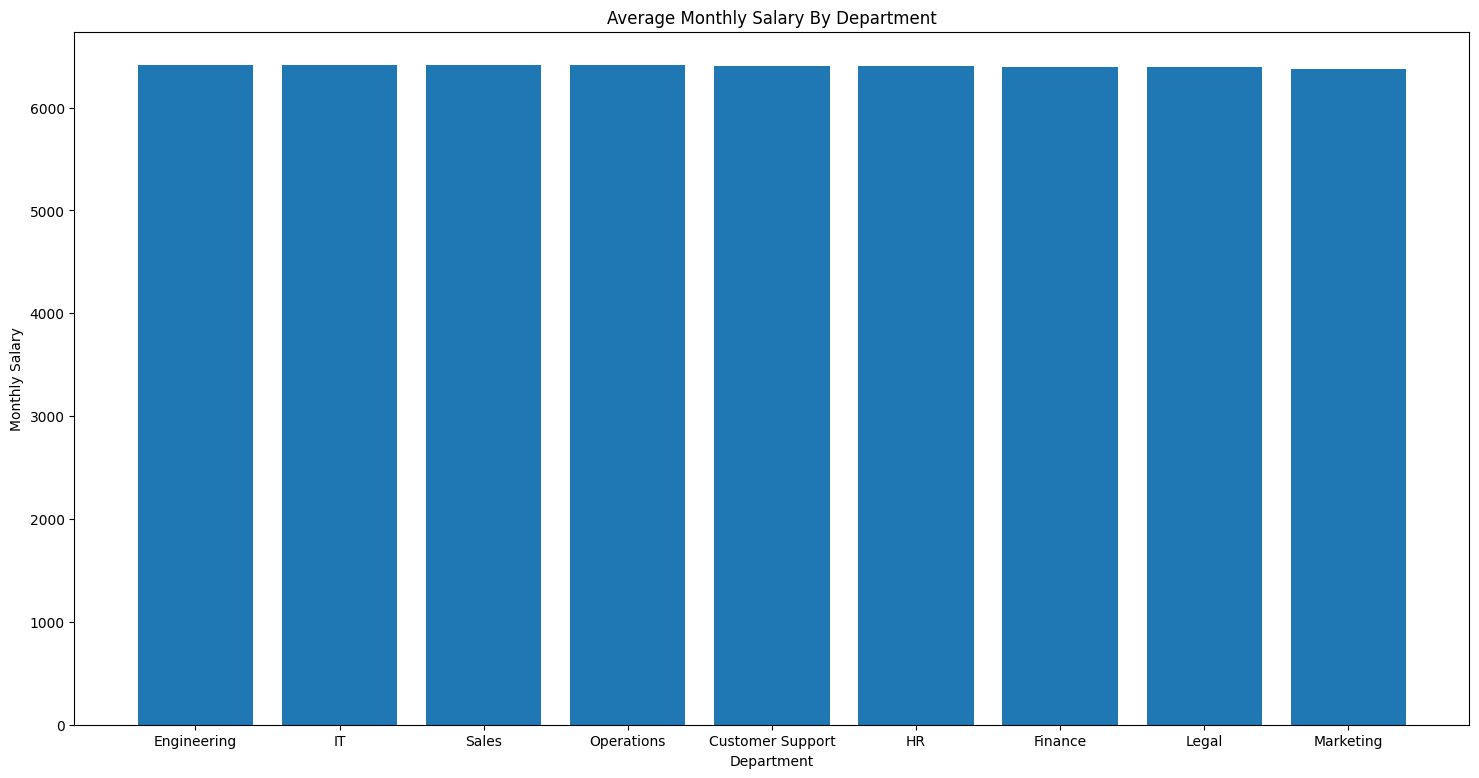

In [9]:
# Plot the `mean_sal_dep` 
plt.figure(figsize=(18, 9))
plt.bar(mean_sal_dep['department'], mean_sal_dep['monthly_salary'])
plt.xlabel("Department")
plt.ylabel("Monthly Salary")
plt.title("Average Monthly Salary By Department")
plt.show()

In [10]:
# identify unique `performance_score` values 
print(df['performance_score'].unique())

# identify number of employees for each `performance_score`  
num_emp_score = df['performance_score'].value_counts()
num_emp_score

[5 3 2 1 4]


performance_score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

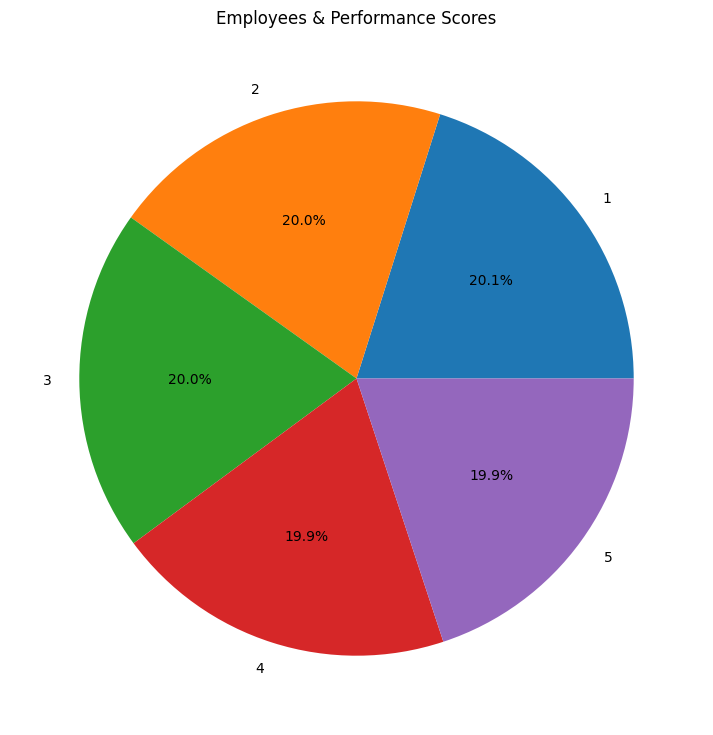

In [11]:
# Plot `num_emp_score`
plt.figure(figsize=(18,9))
plt.pie(num_emp_score.values, labels=num_emp_score.index, autopct='%1.1f%%')
plt.title("Employees & Performance Scores")
plt.show()

In [12]:
# Check `gender` distribution 
df['gender'].value_counts()

gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

In [13]:
# extract average 'years_at_company` for each `department` 
df.groupby('department')['years_at_company'].mean().sort_values(ascending=False)

department
Marketing           4.504458
Engineering         4.488956
Customer Support    4.487675
Finance             4.481429
HR                  4.473996
Operations          4.473571
Sales               4.469430
Legal               4.469059
IT                  4.435990
Name: years_at_company, dtype: float64

In [14]:
# Check employees by `department` distribution 
df['department'].value_counts().sort_values(ascending=False)

department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

In [15]:
# take descriptive statistics for numerical variables grouped by `department`
df.groupby('department').describe()

age                                                      \
                    count       mean        std   min   25%   50%   75%   max   
department                                                                      
Customer Support  11116.0  40.948003  11.236668  22.0  31.0  41.0  51.0  60.0   
Engineering       10956.0  41.122216  11.204735  22.0  32.0  41.0  51.0  60.0   
Finance           11200.0  41.020357  11.176851  22.0  32.0  41.0  51.0  60.0   
HR                10960.0  40.984033  11.271076  22.0  31.0  41.0  51.0  60.0   
IT                11131.0  41.077891  11.287437  22.0  31.0  41.0  51.0  60.0   
Legal             11118.0  40.982101  11.250304  22.0  31.0  41.0  51.0  60.0   
Marketing         11216.0  41.127764  11.247382  22.0  31.0  41.0  51.0  60.0   
Operations        11181.0  41.118862  11.282314  22.0  31.0  41.0  51.0  60.0   
Sales             11122.0  40.882845  11.241200  22.0  31.0  41.0  51.0  60.0   

                 years_at_company            ... promotions       \
                            count      mean  ...        75%  max   
department                                   ...                   
Customer Support          11116.0  4.487675  ...        2.0  2.0   
Engineering               10956.0  4.488956  ...        2.0  2.0   
Finance                   11200.0  4.481429  ...        2.0  2.0   
HR                        10960.0  4.473996  ...        2.0  2.0   
IT                        11131.0  4.435990  ...        2.0  2.0   
Legal                     11118.0  4.469059  ...        2.0  2.0   
Marketing                 11216.0  4.504458  ...        2.0  2.0   
Operations                11181.0  4.473571  ...        2.0  2.0   
Sales                     11122.0  4.469430  ...        2.0  2.0   

                 employee_satisfaction_score                                   \
                                       count      mean       std  min     25%   
department                                                                      
Customer Support                     11116.0  2.968044  1.153640  1.0  1.9600   
Engineering                          10956.0  3.002904  1.144460  1.0  2.0200   
Finance                              11200.0  3.003956  1.149729  1.0  2.0200   
HR                                   10960.0  2.995109  1.144971  1.0  2.0000   
IT                                   11131.0  3.023245  1.151688  1.0  2.0300   
Legal                                11118.0  2.985031  1.152926  1.0  1.9900   
Marketing                            11216.0  2.994067  1.150952  1.0  2.0075   
Operations                           11181.0  3.025930  1.146314  1.0  2.0500   
Sales                                11122.0  2.993334  1.160850  1.0  1.9800   

                                   
                   50%   75%  max  
department                         
Customer Support  2.96  3.97  5.0  
Engineering       2.99  3.99  5.0  
Finance           2.99  4.00  5.0  
HR                3.02  3.97  5.0  
IT                3.03  4.03  5.0  
Legal             2.98  3.98  5.0  
Marketing         2.98  3.99  5.0  
Operations        3.03  4.01  5.0  
Sales             2.99  4.01  5.0  

[9 rows x 64 columns]

In [16]:
# take descriptive statistics for categorical variables grouped by `department`
df.groupby('department').describe(include=['object'])

gender                      job_title                     \
                  count unique     top  freq     count unique         top   
department                                                                  
Customer Support  11116      3    Male  5486     11116      7  Specialist   
Engineering       10956      3    Male  5293     10956      7  Specialist   
Finance           11200      3  Female  5381     11200      7  Consultant   
HR                10960      3  Female  5260     10960      7  Technician   
IT                11131      3    Male  5366     11131      7     Manager   
Legal             11118      3  Female  5401     11118      7     Analyst   
Marketing         11216      3  Female  5397     11216      7  Technician   
Operations        11181      3  Female  5398     11181      7  Technician   
Sales             11122      3  Female  5380     11122      7   Developer   

                       education_level                         
                  freq           count unique       top  freq  
department                                                     
Customer Support  1630           11116      4  Bachelor  5501  
Engineering       1654           10956      4  Bachelor  5534  
Finance           1640           11200      4  Bachelor  5529  
HR                1599           10960      4  Bachelor  5561  
IT                1656           11131      4  Bachelor  5466  
Legal             1623           11118      4  Bachelor  5600  
Marketing         1682           11216      4  Bachelor  5595  
Operations        1635           11181      4  Bachelor  5606  
Sales             1644           11122      4  Bachelor  5649

In [17]:
# extract average 'overtime_hours` for each `department` 
df.groupby('department')['overtime_hours'].mean().sort_values(ascending=False)

department
IT                  14.672716
Engineering         14.593282
HR                  14.577099
Legal               14.548390
Operations          14.520794
Sales               14.513757
Marketing           14.482792
Customer Support    14.383951
Finance             14.344911
Name: overtime_hours, dtype: float64

In [18]:
# extract average 'overtime_hours` for each `department` and each `gender` type 
df.groupby(['department', 'gender'])['overtime_hours'].mean().sort_values(ascending=False)

department        gender
Operations        Other     15.123874
Legal             Other     14.741176
IT                Female    14.703857
Engineering       Female    14.698030
Sales             Male      14.666164
IT                Male      14.665673
HR                Female    14.651711
Finance           Other     14.644681
Legal             Female    14.604333
Marketing         Female    14.601631
Sales             Other     14.581818
Engineering       Male      14.559229
HR                Male      14.511971
Operations        Female    14.503520
                  Male      14.488106
Legal             Male      14.475813
Customer Support  Female    14.471374
HR                Other     14.467641
IT                Other     14.388889
Marketing         Male      14.386959
Finance           Male      14.367171
Sales             Female    14.357993
Customer Support  Male      14.315895
Finance           Female    14.296599
Marketing         Other     14.194954
Customer Support  Other  

In [19]:
# extract average 'overtime_hours` for each `department` and each `performance_score` type 
df.groupby(['department', 'performance_score'])['overtime_hours'].mean().sort_values(ascending=False)

department        performance_score
IT                3                    14.875000
Operations        5                    14.836991
Legal             1                    14.836426
IT                1                    14.764365
HR                2                    14.758087
Customer Support  3                    14.748092
IT                4                    14.725526
Engineering       2                    14.712191
HR                1                    14.711942
Operations        3                    14.698004
Marketing         3                    14.625000
Engineering       5                    14.618502
Sales             3                    14.610071
Legal             2                    14.607808
Engineering       3                    14.595946
IT                5                    14.594464
Operations        1                    14.587394
Engineering       4                    14.570896
Legal             5                    14.568725
Marketing         1              

In [20]:
# extract numeric variables 
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,age,years_at_company,performance_score,monthly_salary,projects_handled,overtime_hours,promotions,employee_satisfaction_score
0,55,2,5,6750.0,32,22,0,2.63
1,29,0,5,7500.0,34,13,2,1.72
2,55,8,3,5850.0,27,6,0,3.17
3,48,7,2,4800.0,10,28,1,1.86
4,36,3,2,4800.0,11,29,1,1.25
...,...,...,...,...,...,...,...,...
99995,27,1,4,4900.0,46,5,2,1.28
99996,36,6,5,8250.0,35,7,1,3.48
99997,53,8,2,4800.0,13,6,1,2.60
99998,22,9,5,8250.0,43,10,1,3.10


In [21]:
# find correlation between numeric variables and 'performance_score', if any 
df_numeric.corr()['performance_score'].sort_values(ascending=False)

performance_score              1.000000
monthly_salary                 0.510035
employee_satisfaction_score    0.001696
years_at_company               0.001598
age                            0.001598
projects_handled               0.000640
overtime_hours                -0.001312
promotions                    -0.003501
Name: performance_score, dtype: float64

#### Model Engineering

In [22]:
X = df[['years_at_company', 'monthly_salary', 'overtime_hours', 'promotions', 'employee_satisfaction_score']]
y = df['performance_score']

In [23]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# scale X_train 
X_train = scaler.fit_transform(X_train)

# scale X_test
X_test = scaler.fit_transform(X_test)

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [26]:
from sklearn.metrics import accuracy_score

def model_performance(predictions):
    print(f"Model's Accuracy Score Is: {format(accuracy_score(y_test, predictions))}")

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

# Initialize the model
lg = LogisticRegression()

# Train the model 
lg.fit(X_train, y_train)

# Make predictions 
lg_predictions = lg.predict(X_test)

In [28]:
# Find accuracy_score of the model 
model_performance(lg_predictions)

Model's Accuracy Score Is: 0.3147


In [29]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": [3,5,7,9,11],
    "weights": ["uniform", "distance"]}

grid_kn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid_kn.fit(X_train, y_train)

grid_kn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [30]:
predictions = grid_kn.predict(X_test)
model_performance(predictions)

Model's Accuracy Score Is: 0.4968


In [ ]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]}

grid_svc = GridSearchCV(svm, param_grid, cv=5)

grid_svc.fit(X_train, y_train)

y_pred = grid_svc.predict(X_test)

model_performance(y_pred)

In [32]:
import streamlit as st 
import joblib

st.title("Employee Performance Score Prediction")

2025-05-07 10:41:23.101 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 10:41:23.394 
  command:

    streamlit run C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-07 10:41:23.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
scaler = joblib.load("scaler.pkl")
model = joblib.load("model.pkl")

st.divider()

st.write("You can get a performance estimation for an employee after entering the employee's status as shown above")

st.divider()

years = st.number_input("Enter employee's years at company: ", min_value=0, max_value=15, value=2)
salary = st.number_input("Enter employee's monthly salary: ", min_value=1000, max_value=10000, value=4000)
overtime = st.number_input("Enter employee's overtime hours: ", min_value=0, max_value=100, value=0)
promotions = st.number_input("Enter employee's promotions: ", min_value=0, max_value=10, value=0)
satisfaction = st.number_input("Enter employee's satisfaction score: ", min_value=0.0, max_value=5.0, value=2.0)

st.divider()

X = [years, salary, overtime, promotions, satisfaction]

prediction_button = st.button("Predict employee's performance score")

st.divider()

if prediction_button:
    X1 = np.array(X)
    X_array = scaler.transform([X1])
    prediction = model.predict(X_array)[0]
    st.ballons()
    st.write(f"Prediction for employee's performance score is: {prediction}")
else:
    st.write("Please use the button to predict employee's performance score")